In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#для более четкого отображения графиков, векторный формат
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

#параметры графика
from pylab import rcParams
plt.style.use('Solarize_Light2')

import seaborn as sns; sns.set()

from scipy.stats import chisquare

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm

In [2]:
# Данные по качеству разных вин, ссылка на них:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Анализ португальских вин "Vinho Verde":
# 1. По имеющимся данным расчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.
# 2. Проверить, распределение случайной величины - качество вина. 
# 3. Проверить есть ли зависимость различных параметров.
# 4. Посмотреть какие пораметры влияют на качество вин сильнее других.
# 5. Построить линейную регрессию.


In [3]:
# Загружаем данные в датафрейм
df = pd.read_csv('datasets_4458_8204_winequality-red.csv')

In [4]:
# Прочитаем первые 10 строк данных
display(df.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
# Смотрим общую информацию по датафрейму и всем признакам:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

In [6]:
# Смотрим основные статистические характеристики данных по каждому числовому признаку, а именно:
# число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# 1. По имеющимся данным расчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.

#Мода
quality_mod = np.quantile(df['quality'], 0.5)
print(f'Мода: {quality_mod}')

# Медиана
quality_med = np.median(df['quality'])
print(f'Медиана: {quality_med}')

# Квартили
quality_75 = np.quantile(df['quality'], 0.75)
print(f'Квартиль 0.75: {quality_75}')

quality_25 = np.quantile(df['quality'], 0.25)
print(f'Квартиль 0.25: {quality_25}')

# Дисперсия
quality_var = np.var(df['quality'],ddof=1)
print(f'Дисперсия: {round(quality_var,2)}')

# СКО
quality_std = quality_var ** 0.5
print(f'СКО: {round(quality_std,2)}')

# СКО
quality_mean = df['quality'].mean()
print(f'Среднее: {round(quality_mean,2)}')

Мода: 6.0
Медиана: 6.0
Квартиль 0.75: 6.0
Квартиль 0.25: 5.0
Дисперсия: 0.65
СКО: 0.81
Среднее: 5.64


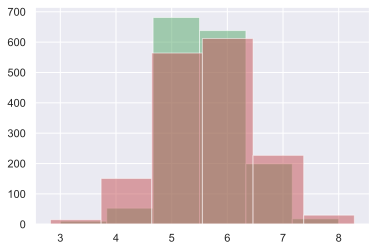

In [8]:
# 2. Проверить, распределение случайной величины - качество вина. 

#Визуально оценим гистограмму распределения
# При этом воспользуемся вычисленными ранее статистическими величнами для генерации распределения по нормальному закону,
# для визуального сравнения

n = len(df['quality'])

#Генерируем нормально распределенные величины с параметрами нашего распределения
samples = np.random.normal(quality_mean, quality_std, size=n)

pract_data = plt.hist(df['quality'], bins=6,color='g', alpha=0.5)
theor_data = plt.hist(samples, bins=6, color='r',alpha=0.5)

plt.show()

# Из графика видно, что распределение (pract_data - зеленый цвет) очень похоже на нормальное


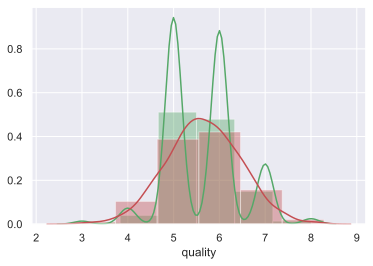

In [9]:
# Здесь ради интереса построены гистограммы с помощью Seaborn, с графиком функции плотности

pract_data = sns.distplot(df['quality'], bins=6,color='g')#, alpha=0.5)
theor_data = sns.distplot(samples, bins=6, color='r')#,alpha=0.5)

plt.show()

In [10]:
# Проверим по критерию Хи-квадрат

stat, p_value = chisquare(df['quality'], f_exp=samples)

print(f'Статистичка: {round(stat,2)}; Вероятность: {p_value}')

#Получаем высокое значение вероятности, что означает схожесть поведения данных

Статистичка: 401.81; Вероятность: 1.0


In [11]:
# Применим Тест Шапиро-Вилка чтобы оценить выборку данных и получить количественную оценку вероятности того,
# что данные имеют нормальное распределение

stat, p = shapiro(df['quality'])

alpha = 0.05
if p > alpha:
    print('Распределение нормальное гипотезу H0 не отвергаем')
else:
    print('Распределение не нормальное гипотезу H0 отвергаем')

print(f'Статистика: {round(stat,2)}; Вероятность: {p}')

Распределение не нормальное гипотезу H0 отвергаем
Статистика: 0.86; Вероятность: 9.504003839923922e-36


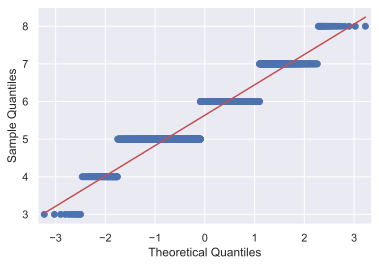

In [12]:
# Построим график квантилей
qqplot(df['quality'], line='s')
plt.show()
# При нормальном распределении проверяемой переменной точки на графике квантилей должны выстраиваться в прямую линию
# Однако из графика видно, что значения сильно отклоняются от линии при сохранении общей тенденции

In [13]:
def highlight_corr(val):
    """ Подсветка корреляционной матрицы    
    """
    if ((val > -0.999 and val < -0.8) or (val < 0.999 and val > 0.8)):
        color = 'DodgerBlue'
    elif ((val >= -0.8 and val < -0.6) or (val <= 0.8 and val > 0.6)):
        color = 'DeepSkyBlue'
    elif ((val >= -0.6 and val < -0.4) or (val < 0.6 and val > 0.4)):
        color = 'LightSkyBlue'
    elif ((val >= -0.2 and val < -0.01) or (val < 0.2 and val > 0.01)):
        color = 'Red'        
    elif (val == 1):
        color = 'Green'
    else:
        color = 'Yellow'
    return f'background-color:{color}'

In [14]:
# 3. Проверить есть ли зависимость различных параметров
# 4. Посмотреть какие пораметры влияют на качество вин сильнее других

# Построим корреляционную матрицу, для выявления слабо связанных с признаком факторов

corr_pd = df[["fixed acidity", 
              "volatile acidity",
              "citric acid", 
              "residual sugar", 
              "chlorides", 
              "free sulfur dioxide",
              "total sulfur dioxide",
              "density", 
              "pH",
              "sulphates",
              "alcohol",
              "quality"]].corr()

display(corr_pd.style.set_caption('Корреляционная матрица').applymap(highlight_corr))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
# Анализ матрицы показывает, что почти все факторы кроме volatile acidity, citric acid, sulphates, alcohol
# слабо связаны с признаком, при этом тесно связанных между собой факторов не наблюдается,
# значит для построения линейной регрессионой модели будем использовать следующие признаки:
# volatile acidity, citric acid, sulphates, alcohol

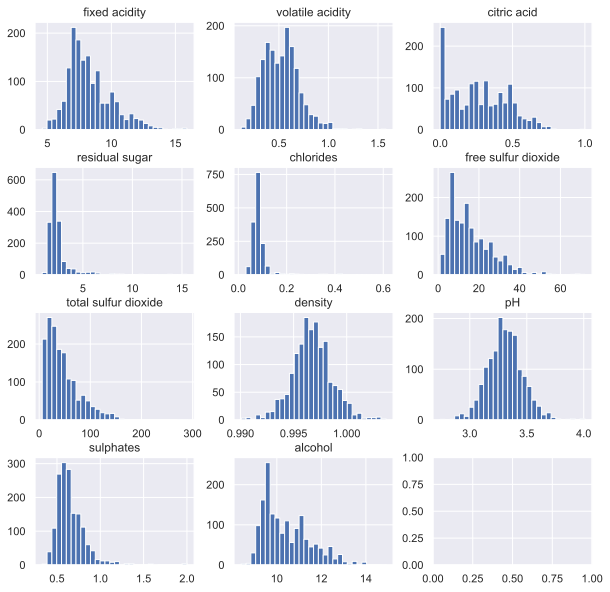

In [16]:
# Посмотрим на распределения переменных построив гистограммы
# Из графиков видно, что гистограммы для параметров, отобранных на предыдущем шаге, носят слабо прослеживаемый
# логнормальный характер

x = df.iloc[:,:-1]
fig, ax = plt.subplots(nrows=4, ncols=3)
axf = ax.flatten()
for i,variable in enumerate(x):
    axf[i].hist(df[variable],bins=30)
    axf[i].set_title(f'{variable}')
fig.set_size_inches(10,10)
plt.subplots_adjust(wspace=0.25,hspace=0.35)

In [17]:
# 5. Построить линейную регрессию

# x - таблица с исходными данными факторов (volatile acidity, citric acid, sulphates, alcohol)
attributes = ["volatile acidity", "citric acid", "sulphates", "alcohol"]
X = df[attributes]

# y - таблица с исходными данными зависимой переменной
y = df.iloc[:,-1]

#Строим модель
model = sm.OLS(y, X).fit()

# Получаем значения предсказанные моделью
predictions = model.predict(X) 

# Выводим статистику
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.655e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:26:02   Log-Likelihood:                         -1681.6
No. Observations:                1599   AIC:                                      3371.
Df Residuals:                    1595   BIC:                                      3393.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
volatile acidity    -0.4691      0.100     -4.688      0.000      -0.665      -0.273
citric acid          0.2337      0.106      2.197      0.028       0.025       0.442
sulphates            1.1051      0.103     10.681      0.000       0.902       1.308
alcohol              0.4869      0.009     56.410      0.000       0.470       0.504
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.809
Skew:                          -0.350   Prob(JB):                     4.73e-23
Kurtosis:                       4.026   Cond. No.                         79.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Полученная модель расчитывалась по методу наименьших квадратов
# По таблице видно высокое значение R2 = 0.985 (процент дисперсии, который объясняет наша модель)
# 
# Практически все факторы кроме "citric acid" оказались значимыми. 
# Уберём незначимую переменную "citric acid" и построим регрессию ещё раз.

In [19]:
# x - таблица с исходными данными факторов (volatile acidity, sulphates, alcohol)
attributes = ["volatile acidity", "sulphates", "alcohol"]
X = df[attributes]

#Строим модель
model = sm.OLS(y, X).fit()

# Получаем значения предсказанные моделью
predictions = model.predict(X)

# Выводим статистику
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.531e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:26:03   Log-Likelihood:                         -1684.0
No. Observations:                1599   AIC:                                      3374.
Df Residuals:                    1596   BIC:                                      3390.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
volatile acidity    -0.5722      0.088     -6.469      0.000      -0.746      -0.399
sulphates            1.1734      0.099     11.877      0.000       0.980       1.367
alcohol              0.4938      0.008     61.368      0.000       0.478       0.510
==============================================================================
Omnibus:                       64.621   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.443
Skew:                          -0.349   Prob(JB):                     5.69e-23
Kurtosis:                       4.026   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Теперь все факторы оказались значимы,
# значение R2 не изменилось

# Значения парамтера Durbin-Watson близко к 2, значит автокорреляция почти отсутствует
# следует отметить, что значение на 0.01 стало меньше после исключения фактора "citric acid"
